In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis of Vaccination Rates in U.S. Schools

In this project, I have conducted an EDA of immunization rates among schools across 32 States in the U.S. The dataset  contains vaccination data for 46,412 schools in 32 states, and was compiled by The Wall Street Journal. Vaccination rates for the 2017-18 school year are included for 11 states, while rates for other states are for the 2018-19 school year.

My analysis will focus on comparing vaccination rates across public, private, and charter schools, and exploring variations in overal vaccination rates as compared to rates of MMR vaccinations. My goal was to  identify trends and patterns in immunization practices among differing school communities.

The dataset used in this analysis is available under the Creative Commons Attribution-ShareAlike 4.0 International License and was compiled by The Wall Street Journal.


### Section 1: Exploratory Data Analysys and Data Preprocessing
- Analysis of Vaccine Data
- Check for missing values, duplicates, and outliers.
- Take care of missing values as appropriate.
- Rename columns for clarity.
- Perform any initial data cleaning and preparation steps.

### Section 2: Descriptive Analysis and Visualization
- Compute summary statistics for numerical variables.
- Analyze categorical variables by calculating frequency counts and percentages.
- Create visualizations to explore relationships between variables.
- Identify any patterns and trends in the data.


### Section 3: In-depth Exploration and Insights
- Interpret your findings and draw meaningful insights from the data.
- Consider the implications of your analysis for public health policies, interventions, or further research.

## Section 1: Exploratory Data Analysis and Data Preprocessing


In this initial section of the analysis, I conducted an exploratory data analysis (EDA) and performed data preprocessing steps to prepare the dataset for further analysis. The dataset, containing vaccination data for 46,412 schools across the United States, was already provided in a clean and well-structured format, which greatly minimized the need for extensive preprocessing. While I would have liked to have had more practice in the preprocessing stage during the EDA, I did enjoy the ability to transition quickly to the exploratory phase of the project since the data was already very organized.


In [2]:
file_path = r"C:\Users\13512\Desktop\Bootcamp\all-measles-rates.csv"

data = pd.read_csv(file_path)

print(data.head())

   index    state     year                                      name     type  \
0      1  Arizona  2018-19                   A J Mitchell Elementary   Public   
1      2  Arizona  2018-19                           Academy Del Sol  Charter   
2      3  Arizona  2018-19                    Academy Del Sol - Hope  Charter   
3      4  Arizona  2018-19  Academy Of Mathematics And Science South  Charter   
4      5  Arizona  2018-19                           Acclaim Academy  Charter   

      city      county district  enroll    mmr  overall  xrel  xmed  xper  
0  Nogales  Santa Cruz      NaN    51.0  100.0     -1.0   NaN   NaN   NaN  
1   Tucson        Pima      NaN    22.0  100.0     -1.0   NaN   NaN   NaN  
2   Tucson        Pima      NaN    85.0  100.0     -1.0   NaN   NaN   NaN  
3  Phoenix    Maricopa      NaN    60.0  100.0     -1.0   NaN   NaN   NaN  
4  Phoenix    Maricopa      NaN    43.0  100.0     -1.0   NaN  2.33  2.33  


In [3]:
print(data.dtypes) #checking for appropriate datatypes 

index         int64
state        object
year         object
name         object
type         object
city         object
county       object
district     object
enroll      float64
mmr         float64
overall     float64
xrel        float64
xmed        float64
xper        float64
dtype: object


In [4]:
print(data.columns) #checking to see if there are columns that I would like to rename for clarity

Index(['index', 'state', 'year', 'name', 'type', 'city', 'county', 'district',
       'enroll', 'mmr', 'overall', 'xrel', 'xmed', 'xper'],
      dtype='object')


I was happy with the data types and column names as provided. I did not change any data types or remove or rename any columns. 

In [5]:
data.isnull().sum() #checking for total null values

index           0
state           0
year         4681
name            0
type        27174
city        17339
county       5158
district    39009
enroll      12844
mmr             0
overall         0
xrel        34270
xmed        33439
xper        40000
dtype: int64

In [6]:
#attempt to reconcile null values 

data.dropna(subset=['type'], inplace=True)



- I chose not to remove null values from the year column, since the years of data collection were defined in the description of the data.

- I removed any rows with null values present in the type of school, as this information was vital to establishing patterns between types of schools. 

- I did not remove any rows missing data pertaining to location, district, or enrollment. 

- I replaced the null values in the religeous, medical, and personal exemption columns so that there were no null values present. 

In [7]:
# Impute null values in 'xrel', 'xmed', and 'xper' columns with a custom value (e.g., -1)
custom_value = -1
data['xrel'].fillna(custom_value, inplace=True)
data['xmed'].fillna(custom_value, inplace=True)
data['xper'].fillna(custom_value, inplace=True)

In [8]:
# Filter out rows with 'type' column containing 'Nonpublic' 'charter' or 'BOCES'
filtered_data = data[~data['type'].isin(['Nonpublic', 'BOCES', 'Charter'])]

# Show the first few rows of the filtered dataset
print(filtered_data.head())

    index    state     year                       name     type      city  \
0       1  Arizona  2018-19    A J Mitchell Elementary   Public   Nogales   
5       6  Arizona  2018-19            Alfred F Garcia   Public   Phoenix   
8       9  Arizona  2018-19   Arizona Cultural Academy  Private   Phoenix   
9      10  Arizona  2018-19  Arizona Desert Elementary   Public  San Luis   
10     11  Arizona  2018-19          Arthur M Hamilton   Public   Phoenix   

        county district  enroll    mmr  overall  xrel  xmed  xper  
0   Santa Cruz      NaN    51.0  100.0     -1.0  -1.0 -1.00  -1.0  
5     Maricopa      NaN    36.0  100.0     -1.0  -1.0 -1.00  -1.0  
8     Maricopa      NaN    26.0  100.0     -1.0  -1.0 -1.00  -1.0  
9         Yuma      NaN    78.0  100.0     -1.0  -1.0 -1.00  -1.0  
10    Maricopa      NaN    35.0  100.0     -1.0  -1.0  2.86  -1.0  


In [9]:
data.isnull().sum() #checking for total null values

index           0
state           0
year            0
name            0
type            0
city         1319
county          0
district    17918
enroll       6389
mmr             0
overall         0
xrel            0
xmed            0
xper            0
dtype: int64

After checking again for null values, I feel confident I can effectively work with this data. 

I then filtered the data by type and did some initial examination of summary statistics to get an idea of what overall vaccination rates were for each type of school: Public, Private, and Kindergarten

## Descriptive Analysis and Visualization

I began my analysis by making box plots showing overall vaccination rates for Public, Private, and Kindergarten Schools. 

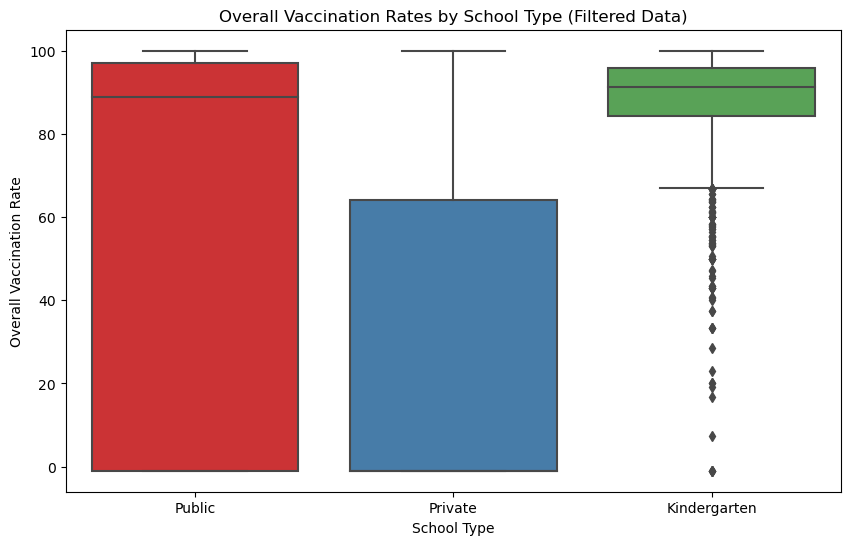

In [13]:
public_data = data[data['type'] == 'public']
private_data = data[data['type'] == 'private']
charter_data = data[data['type'] == 'charter']

# Step 2: Create the Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='type', y='overall', palette='Set1')
plt.title('Overall Vaccination Rates by School Type (Filtered Data)')
plt.xlabel('School Type')
plt.ylabel('Overall Vaccination Rate')
plt.show()

It is clear that Public schools have significantly higher vaccination rates than private schools, and Kindergarten vaccination rates had the highest median rate of all three types. 

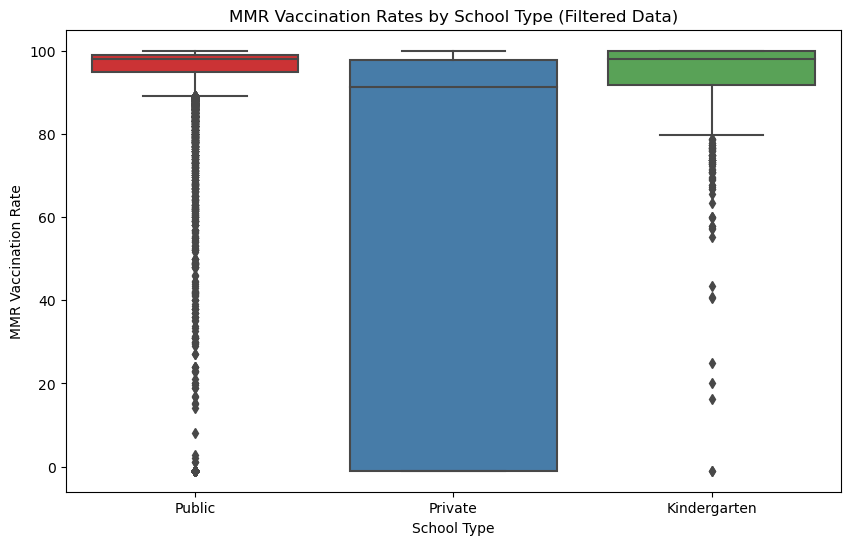

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='type', y='mmr', palette='Set1')
plt.title('MMR Vaccination Rates by School Type (Filtered Data)')
plt.xlabel('School Type')
plt.ylabel('MMR Vaccination Rate')
plt.show()

This trend continued for specific MMR type vaccines, but was much more pronounced. Notably, private school MMR vaccine rates were much higher than the overall rate noted in the previous box plot. 

Next, I analyzed what trends were present in the types of exemptions cited for unvaccinated students: Religeous, Medical, and Personal. 

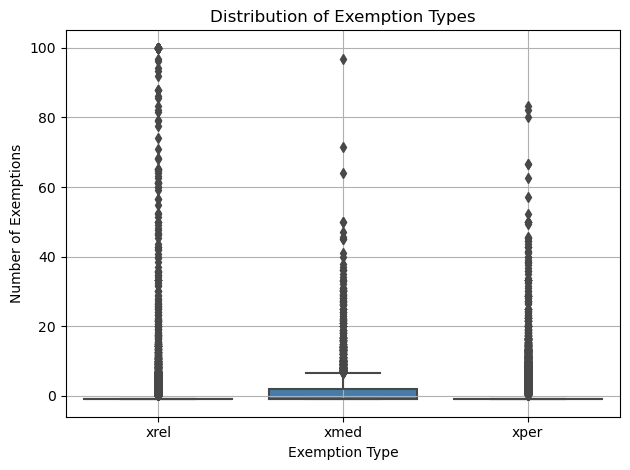

In [14]:
sns.boxplot(data=filtered_data[['xrel', 'xmed', 'xper']], palette='Set1')

# Add labels and title
plt.title('Distribution of Exemption Types')
plt.xlabel('Exemption Type')
plt.ylabel('Number of Exemptions')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()